# Intransitive Dice

[Inspired by this YouTube video](https://www.youtube.com/watch?v=jmuJuw9anQw), I wanted to explore sets of Intransitive Dice. Such a set is weird because, on average, A beats B, B beats C, and (surprisingly) C beats A.

Below I have a function (allDice) that finds all the ways (there are 110 of them) that you can have integers on all 6 sides of a die but have the average roll be 3.5. Really that just means that all the numbers add up to 21. For example, <1,1,1,1,1,16> does the trick along with the boring <1,2,3,4,5>.

Then "compare2" takes two tallies (which is a list of all possible numbers on the die and how often it happens, so <1,1,1,1,1,16> would give <<1,5>, <16,1>> and figure out the probability of the first die beating the second die. I had to be careful with ties, though, as I've decided to have those not count in the probability (so if there's ties, there really aren't 36 separate rolls of both dice).

Finally "check3" takes three dice and finds out the probability of A beating B, B beating C, and C beating A. And then "checkRandom3" will do "check3" for a random selection.

In [1]:
allDice=IntegerPartitions[21,{6}];
compare2[{tally1_, tally2_}]:=(allPairs=Flatten[Table[{t1,t2},{t1,tally1},{t2,tally2}],1];
                               nonTiePairs=Select[allPairs,#[[1,1]]!=#[[2,1]]&];
                               totalPossibilities=Total[#[[1,2]] #[[2,2]]&/@nonTiePairs];
                               N[Total[If[#[[1,1]]>#[[2,1]], #[[1,2]] #[[2,2]]/totalPossibilities,0]&/@nonTiePairs]]
                               );
check3[dice_]:=(tallies=Tally/@dice;
                 compare2[{tallies[[#[[1]]]], tallies[[#[[2]]]]}]&/@{{1,2},{2,3},{3,1}}
                 );
checkRandom3[]:=(dice=RandomChoice[allDice,3];
                 check3[dice]
                 );

checkRandom3[]

{0.535714, 0.583333, 0.357143}

0.0031539

0.518519   0.575758   0.451613
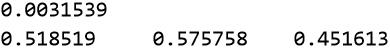

In [44]:
AbsoluteTiming[checkRandom3[]]//TableForm

Here I find all the collections of 3 separate dice from the list of all possibilities. There are over 200,000 of them. Then I check them all with "check3" and return a list of all possibilities with their probabilities listed and then the dice listed.

In [7]:
allSubsets=Subsets[allDice,{3}];
allPossibilities=Table[{check3[i], i},{i,allSubsets}];

Here's just the first 3:

0.375      16 1 1 1 1 1
0.5        15 2 1 1 1 1
0.625      14 3 1 1 1 1

0.375      16 1 1 1 1 1
0.409091   15 2 1 1 1 1
0.714286   14 2 2 1 1 1

0.375      16 1 1 1 1 1
0.5        15 2 1 1 1 1
0.625      13 4 1 1 1 1
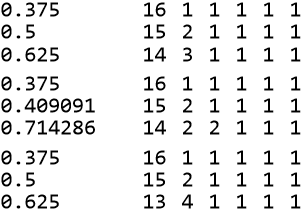

In [45]:
allPossibilities[[1;;3]]//TableForm

Here I use "goodMatch" to see if the three probabilities (A beats B, B beats C, and C beats A) are strongly intransitive. For me that means they're all on the same side of 0.5 and their product is as large as possible. I think doing sum would have worked as well. If they're not all on the same side of 0.5 I score them at -10 (so that they get sorted at the end). Then I build a "sortFunction" that uses "goodMatch" as the sort function and then I sort them.

In [37]:
goodMatch[try_]:=If[Length[Union[Sign/@(tmp=((0.5-#)&/@try[[1]]))]]==1, -1 Times@@tmp, -10];
sortFunction[try1_, try2_]:=If[goodMatch[try1]>goodMatch[try2],1,-1];
sortedPossibilities=Sort[allPossibilities, sortFunction];

Here's the best one (the first one of the sorted list). No surprise that it's the set that is described in the youtube vid linked at the top of this post.

0.583333   6 3 3 3 3 3
0.583333   5 5 5 2 2 2
0.694444   4 4 4 4 4 1

0.00135031
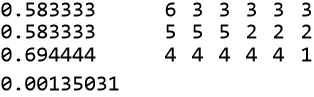

In [46]:
{sortedPossibilities[[1]],goodMatch[sortedPossibilities[[1]]]}//TableForm

The youtube vid links to [this Quantum Magazine article](https://www.quantamagazine.org/mathematicians-roll-dice-and-get-rock-paper-scissors-20230119/) that seems to suggest that they only consider dice that use the numbers 1-6 on the faces (so <1,1,1,1,1,16> wasn't explored). I gather, at least given my "goodMatch" function, that there are no dice with numbers above 6 that do any better than the set explored in the video.

Here's some that are intransitive that have at least one die that uses a face above 6:

0.555556   7 6 2 2 2 2
0.636364   5 5 5 4 1 1
0.666667   4 4 4 3 3 3

0.555556   7 6 2 2 2 2
0.625      5 5 5 4 1 1
0.625      4 4 4 4 3 2

0.555556   7 6 2 2 2 2
0.59375    5 5 5 4 1 1
0.666667   5 4 3 3 3 3

0.558824   7 3 3 3 3 2
0.571429   6 5 5 2 2 1
0.694444   4 4 4 4 4 1

0.571429   7 3 3 3 3 2
0.558824   6 6 5 2 1 1
0.694444   4 4 4 4 4 1

0.545455   7 3 3 3 3 2
0.583333   5 5 5 2 2 2
0.694444   4 4 4 4 4 1

0.583333   7 3 3 3 3 2
0.545455   6 6 6 1 1 1
0.694444   4 4 4 4 4 1

0.583333   8 3 3 3 2 2
0.545455   6 6 6 1 1 1
0.694444   4 4 4 4 4 1

0.583333   8 3 3 3 2 2
0.545455   7 6 5 1 1 1
0.694444   4 4 4 4 4 1

0.583333   9 3 3 2 2 2
0.545455   6 6 6 1 1 1
0.694444   4 4 4 4 4 1
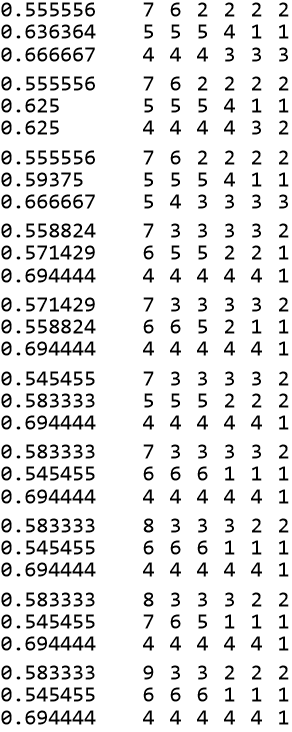

In [47]:
Select[sortedPossibilities, Max[Flatten[#[[2]]]]>6&][[1;;10]]//TableForm

# Your thoughts?

This was a fun exercise in list manipulation, random number generation, and probability. I'd love to hear your thoughts. Here are some starters:

- This is great! I especially loved . . .
- This is dumb. I didn't learn anything new from this. Next time just post the youtube vid.
- Why do you take the product of the win probabilities in your "goodMatch" function?
- I don't think the way you deal with ties is right. Instead I would . . .
- Are you selling these dice sets?
- What's up with [your obsession with dice](https://arundquist.wordpress.com/2020/01/16/one-die-to-rule-them-all/)?
- Could you please format your data lists better?
- The Quantum Magazine article talks about 4 dice chains. What, are you too chicken to try that?